In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
path=r"C:\Users\galia\OneDrive\Escritorio\DA course\6.1\Data"

In [25]:
df_boat= pd.read_pickle(os.path.join(path, "df_boats_cleaned1.pkl"))

In [26]:
df_boat.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,value_in_eur,country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,3337.0,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,3367.0,Denmark
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600.0,Switzerland


### Data cleaning and wrangling

##### In order to test my Hypothesis i need to perform more wrangling
##### Split  boat type column in order to isolate the primary class boat


In [27]:
#slipting boat_tipe after the coma to reduce subclasses of types
df_boat[['boat_type','Boat Type1']]=df_boat['boat_type'].str.split(',', 1, expand=True)

C:\Users\galia\AppData\Local\Temp\ipykernel_26876\2740943439.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boat[['boat_type','Boat Type1']]=df_boat['boat_type'].str.split(',', 1, expand=True)


In [17]:
df_boat.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,value_in_eur,country,Boat Type1
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,3337.0,Switzerland,None
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,None
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,3367.0,Denmark,None
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,None
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600.0,Switzerland,None


#droping no needed columns
df_boat = df_boat.drop(['Boat Type1'],axis=1)

#droping no needed columns
df_boat = df_boat.drop(['boat_type'],axis=1)

In [28]:
#Checks
df_boat.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,value_in_eur,country,Boat Type1
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,3337.0,Switzerland,None
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,None
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,3367.0,Denmark,None
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,None
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600.0,Switzerland,None


### Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [21]:
# Sort df by views
sorted_df = df_boat.sort_values('views_last_7_days', ascending=False)

NameError: name 'ax1' is not defined

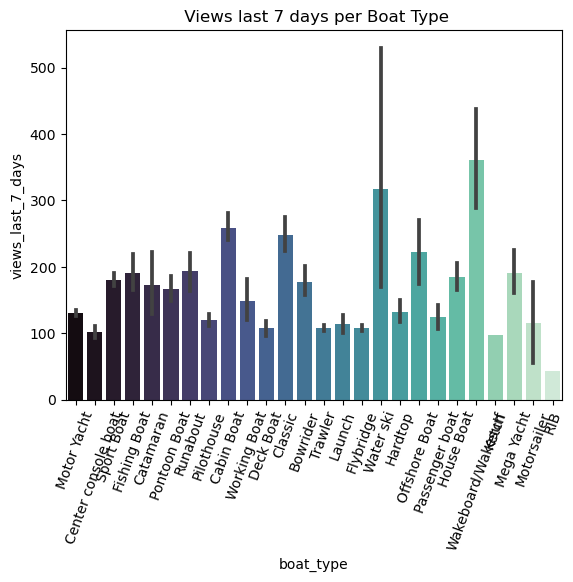

In [29]:
# Checking data trough caterplots

sns.barplot(x='boat_type', y='views_last_7_days', data=df_boat,
                 palette="mako")
plt.title(" Views last 7 days per Boat Type")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
display(Boat_Type_View[-6:])
plt.show()

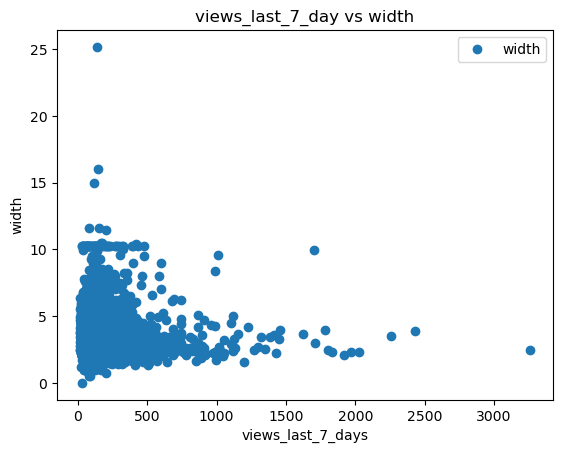

In [30]:
# scaterplot for wide
df_boat.plot(x = 'views_last_7_days', y='width',style='o') 
plt.title('views_last_7_day vs width')  
plt.xlabel('views_last_7_days')  
plt.ylabel('width')  
plt.show()

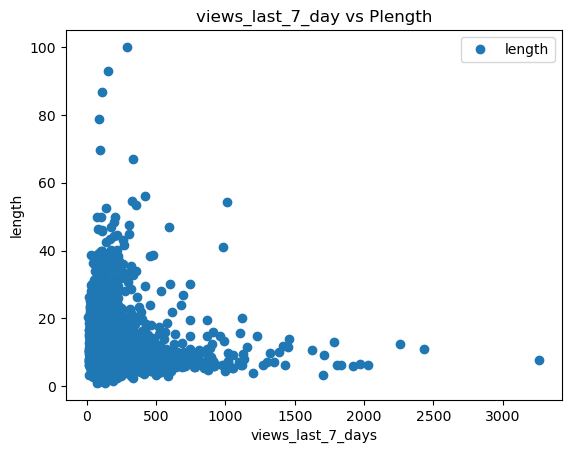

In [31]:
# scaterplot for wide
df_boat.plot(x = 'views_last_7_days', y='length',style='o') 
plt.title('views_last_7_day vs Plength')  
plt.xlabel('views_last_7_days')  
plt.ylabel('length')  
plt.show()

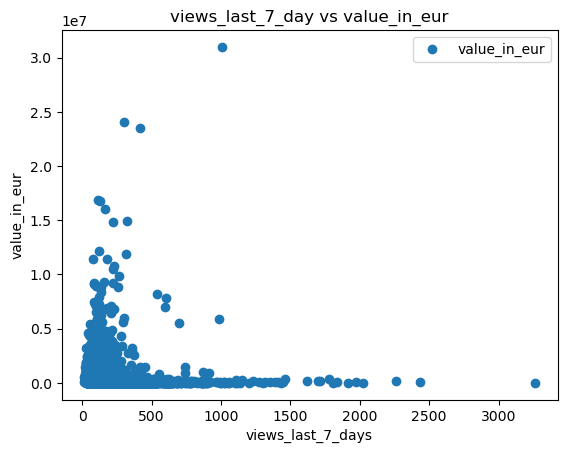

In [32]:
# scaterplot for price in eur
df_boat.plot(x = 'views_last_7_days', y='value_in_eur',style='o') 
plt.title('views_last_7_day vs value_in_eur')  
plt.xlabel('views_last_7_days')  
plt.ylabel('value_in_eur')  
plt.show()

### State your hypothesis in a markdown cell within your Jupyter notebook.
### The amounts of views is more influenced by no quantitative variables, indeed what seems to give more views are variable as materials and kind of boat


### 6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_boat['value_in_eur'].values.reshape(-1,1)
y = df_boat['views_last_7_days'].values.reshape(-1,1)

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### regresion analysis

In [35]:
# Create a regression object.

regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

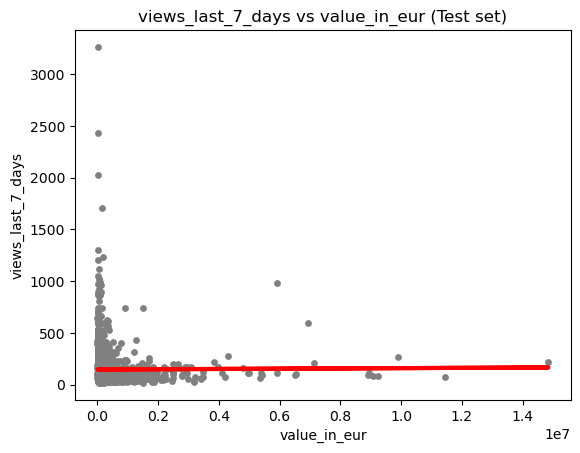

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('views_last_7_days vs value_in_eur (Test set)')
plot_test.xlabel('value_in_eur')
plot_test.ylabel('views_last_7_days')
plot_test.show()

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.32342133e-06]]
Mean squared error:  24629.225350534427
R2 score:  -0.0012210890826793719


In [41]:
y_predicted

array([[146.29380269],
       [146.26726809],
       [147.41871082],
       ...,
       [146.26799598],
       [149.54280205],
       [146.42614483]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,149,146.293803
1,397,146.267268
2,67,147.418711
3,206,146.253968
4,744,146.333505
5,133,147.503410
6,342,146.279907
7,269,146.299321
8,114,146.338799
9,39,146.391736


In [43]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.32342133e-06]]
Mean squared error:  21247.49201783539
R2 score:  8.153515141406942e-05


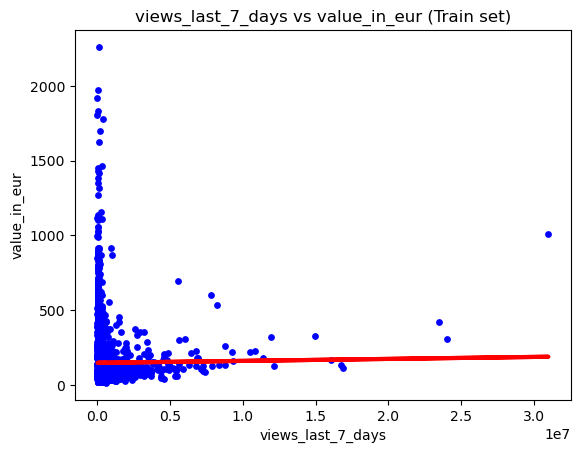

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('views_last_7_days vs value_in_eur (Train set)')
plot_test.xlabel('views_last_7_days')
plot_test.ylabel('value_in_eur')
plot_test.show()

###  The line do not fit in the data we can apreciate a really small curve with positive relationship

### Slope: [[61.60936788]]
### Mean squared error:  989136660492.5021
### R2 score:  8.153515141418044e-05

#### The model show really  High mean squared error that demonstrate the data point are far away from the regression line
#### also the R2 score is almost zero what means the model is not a good predictor to see the views of boats


### Compare the predicted y values with the actual y values in a dataframe

#### the predicted values are complete diferent this confirms the idea is not a good model for the variable

### Include your thoughts on how well the model performed on the test set in a markdown cell.
#####  so far this analysis do not fit in the need to perform my analysis, as we can see in previous exercise the correlation between the variables is low so i need to find another way to find the insigths
    
